# Assignment 2

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

An NOAA dataset has been stored in the file `data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv`. This is the dataset to use for this assignment. Note: The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

Each row in the assignment datafile corresponds to a single observation.

The following variables are provided to you:

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

For this assignment, you must:

1. Read the documentation and familiarize yourself with the dataset, then write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.
2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.
3. Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.
4. Make the visual nice! Leverage principles from the first module in this course when developing your solution. Consider issues such as legends, labels, and chart junk.

The data you have been given is near **Ann Arbor, Michigan, United States**, and the stations the data comes from are shown on the map below.

C:\Users\Joe\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:88: FutureWarning: Series.data is deprecated and will be removed in a future version
C:\Users\Joe\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:89: FutureWarning: Series.data is deprecated and will be removed in a future version


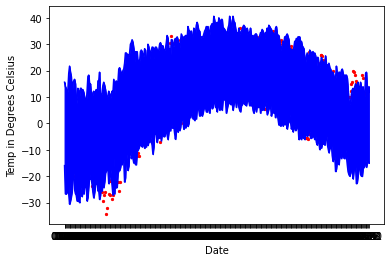

In [25]:
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd
import numpy as np

# data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv

def leaflet_plot_stations(binsize, hashid):

    df = pd.read_csv('data/C2A2_data/BinSize_d{}.csv'.format(binsize))
    
    
    station_locations_by_hash = df[df['hash'] == hashid]

    lons = station_locations_by_hash['LONGITUDE'].tolist()
    lats = station_locations_by_hash['LATITUDE'].tolist()

    plt.figure(figsize=(8,8))

    plt.scatter(lons, lats, c='r', alpha=0.7, s=200)

    return mplleaflet.display()

# leaflet_plot_stations(400,'fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89')


def create_graph():
    # Loads NCEI Data
    ncei_df = pd.read_csv('data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')

    ncei_df =  ncei_df.sort_values(by='Date', ascending=True)
    
    ncei_df['Data_Value'] = (ncei_df['Data_Value']/10)
    
    # create a new column which is just month and day by using a lambda to splice the last 5 of the Date column
    ncei_df['Month Day'] =  ncei_df.Date.apply(lambda x: x[-5:])
    
    # only dates before 1/1/2015
    
    pre_2015_ncei_df = ncei_df[ncei_df['Date'] < '2015-01-01']
     
    # data set for maximum values grouped by month day column
    pre_2015_max_df =  pd.DataFrame(pre_2015_ncei_df.groupby(['Month Day'])['Data_Value'].max())
    
     # data set for min values grouped by month day column
    pre_2015_min_df =  pd.DataFrame(pre_2015_ncei_df.groupby(['Month Day'])['Data_Value'].min())
    
 
    
    # dataframe for values that occured on or after 1/1/2015
    scatter_2015_ncei_df = ncei_df[ncei_df['Date'] >= '2015-01-01']
    
    # create two new dataframes, min and max grouped by month day based on the data_value
    scatter_2015_min_df = pd.DataFrame(scatter_2015_ncei_df.groupby(['Month Day'])['Data_Value'].min())
    scatter_2015_max_df = pd.DataFrame(scatter_2015_ncei_df.groupby(['Month Day'])['Data_Value'].max())
    
    # merge the two sets into one 
    
    merged_2015_df = pd.merge(scatter_2015_min_df, scatter_2015_max_df, left_index=True, right_index=True, how='inner')
    # relabel the columns
    merged_2015_df.columns =  ['2015 Min', '2015 Max']
    # create the pre 2015 data into a similair data set
    pre_2015_merged_df = pd.merge(pre_2015_min_df, pre_2015_max_df, left_index=True, right_index=True, how='inner')
    
    pre_2015_merged_df.columns = ['Pre 2015 Min', 'Pre 2015 Max']
    
    
    pre_and_2015_merged_df = pd.merge(merged_2015_df,pre_2015_merged_df, left_index=True, right_index=True, how='inner')
    
#     df['que'] = df.apply(lambda x : x['one'] if x['one'] >= x['two'] and x['one'] <= x['three'] else "", axis=1)

    # using numpy compare the two columns
    pre_and_2015_merged_df["2015 min less"] = np.where(pre_and_2015_merged_df['2015 Min'] < pre_and_2015_merged_df['Pre 2015 Min'], True, False)
    
    pre_and_2015_merged_df["2015 max more"] = np.where(pre_and_2015_merged_df['2015 Max'] > pre_and_2015_merged_df['Pre 2015 Max'], True, False)

#     higher_max_2015 = (pre_and_2015_merged_df['2015 max more'] == True)
    higher_max_2015_df = pre_and_2015_merged_df[pre_and_2015_merged_df['2015 max more'] == True]
    higher_max_2015_df = higher_max_2015_df['2015 Max']
    
    higher_min_2015_df = pre_and_2015_merged_df[pre_and_2015_merged_df['2015 min less'] == True]
    higher_min_2015_df = higher_min_2015_df['2015 Min']
#     new_df = pd.DataFrame(scatter_2015_min_set)
    # create the plot figure
    plt.figure()
    # maps the pre_min and pre_max as two lines
    plt.plot(pre_2015_max_df, '-', pre_2015_min_df, '-', color='Blue')
    plt.scatter(higher_min_2015_df.index, higher_min_2015_df.data,  s=5, color='Red')
    plt.scatter(higher_max_2015_df.index, higher_max_2015_df.data,  s=5, color='Red')
    
    plt.xlabel('Date')
    plt.ylabel('Temp in Degrees Celsius')
#     plt.legend()
    
    plt.fill_between(pre_2015_max_df.index, pre_2015_max_df['Data_Value'], pre_2015_min_df['Data_Value'], color="Blue")


create_graph()
#     Read the documentation and familiarize yourself 
#     with the dataset, then write some python code which 
#     returns a line graph of the record high and record low 
# temperatures by day of the year over the period 2005-2014. 

#     not positive that the df2, which is coming from a different data source, is ONLY the necessary data as it ish ould be limited by the ID which is the weather station ID
